# Clusterbildung mit K-means

### - Aufgabe - 


Diese Aufgabe befasst sich mit einem sehr beliebten Algorithmus zur Aufteilung eines Datensatzes in sog. Datencluster.

### Was ist Clustering?

Clustering ist eine der gebräuchlichsten Techniken der explorativen Datenanalyse, die verwendet wird, um eine Intuition über die Struktur der Daten zu erhalten. Mit Hilfe von Clustering könnnen Untergruppen in den Daten so identifiziert werden, dass Datenpunkte derselben Untergruppe (Cluster) sehr ähnlich sind, während Datenpunkte in verschiedenen Clustern sehr unterschiedlich sind. Mit anderen Worten, wir versuchen, homogene Untergruppen innerhalb der Daten zu finden, sodass Datenpunkte in jedem Cluster gemäß einem Ähnlichkeitsmaß wie der Distanz zueinander so ähnlich wie möglich sind.

![EinFarbigesCluster.png](https://raw.githubusercontent.com/bethgelab/bwki-weekly-tasks/master/ImagesAndDataForExercises/EinfarbigesCluster.png)

Das obige Streudiagramm enthält Informationen über die Streckenlänge und die Anzahl der Haltestellen von verschiedenen Zügen (die Achsen normalisiert). Wenn du die Punkte in drei Arten von Zügen aufteilen solltest, welche drei Gruppen würdest du bilden?

![FarbigesCluster.png](https://raw.githubusercontent.com/bethgelab/bwki-weekly-tasks/master/ImagesAndDataForExercises/FarbigesCluster.png)

Vermutlich hast du intuitiv die Einteilung, welche in der obigen Graphik zu sehen ist, für Sinnvoll gehalten und damit natürlich auch absolut recht.
Diese Aufgabe war für dich sehr einfach und du hast nicht sonderlich viel überlegen müssen, aber wenn du einem Computer erklären solltest, was genau er machen muss um das gleiche Ergebnis zu erhalten, ist die Antwort nicht offensichtlich.
Klar, er muss sich irgendwie an den Abständen der Punkte zu einander orientieren und nähere Punkte zusammenfassen, aber was passiert genau?

### Wie lassen sich sinnvolle Cluster bilden?

Das Einteilen von Datenpunkte in sog. Cluster (Gruppen/Bündel) lässt sich mit dem K-means-clustering Algorithmus vornehmen.

Der Kmeans-Algorithmus ist ein iterativer Algorithmus, der versucht, den Datensatz in k vordefinierte, unterschiedliche, sich nicht überlappende Untergruppen (Cluster) zu unterteilen, wobei jeder Datenpunkt nur zu einer Gruppe gehören darf. Es versucht, die Datenpunkte innerhalbt eines Clusters so ähnlich wie möglich zu machen und gleichzeitig die Cluster so unterschiedlich (weit entfernt) wie möglich zu halten. Er weist einem Cluster Datenpunkte so zu, dass die Summe des quadrierten Abstands zwischen den Datenpunkten und dem Schwerpunkt des Clusters (Mittelwert aller Datenpunkte, die zu diesem Cluster gehören) minimal ist. Je weniger Variation wir innerhalb von Clustern haben, desto homogener (ähnlicher) sind die Datenpunkte innerhalb desselben Clusters. 

Es werden also anfangs k Punkte ausgewählt und dann iterativ so verschoben, dass der Abstand zwischen jedem der k Punkte und
den ihm zugeordneten Datenpunkten (die die am nächsten an diesem Punkt sind) möglichst gering ist.

Sehen wir uns nun den Ausführungsprozess an, dieser lässt sich in 4 Schritte einteilen:
    
    

### Schritt 1: Initialisieren
Lege zunächst k zufälligen Punkte fest, diese werden als Schwerpunkte des Clusters bezeichnet. 

### Schritt 2: Clusterzuweisung
Nach der Initialisierung werden alle Datenpunkte durchlaufen und der Abstand zwischen allen Schwerpunkten und den Datenpunkten berechnet. Die Datenpunkte werden dem Schwerpunkt zugeordnet zu dem sie den kleinsten Abstand haben.

### Schritt 3: Schwerpunkte verschieben
Da die im obigen Schritt gebildeten Cluster nicht optimiert sind, müssen wir optimierte Cluster bilden.Dafür muss die durchschnittliche Position der Datenpunkte eines Clusters berechnet werden und der Schwerpunkt auf diese Position gesetzt werden.

### Schritt 4: Optimierung
Die obigen beiden Schritte werden wiederholt, bis die Schwerpunkte sich nichtmehr bewegen oder (in unserem Fall) bis eine gewisse Anzahl an Iterationen erreicht wurde.

In [22]:
# Laden der benötigten Module

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
# Implementier hier die vier gegeben Schritte
# arr : ein Array mit Koordinaten der Datenpunkte 
# k : Anzahl der zu bildenden Cluster
# no_of_iterations : Anzahl der Durchläufe

def kmeans(arr, k, no_of_iterations):
    # Zufällige Auswahl von k Schwerpunkten aus der Menge
    # der Datenpunkte 
    idx = np.random.choice(len(arr), k, replace=False)
    centroids = arr[idx, :] # Schritt 1

    
    # bestimme die euklidische Distanzen zwischen den Schwerpunkten 
    # und allen Datenpunkten
    # Tipp: du kannst cdist benutzen
    distances = cdist(arr, centroids, 'euclidean')  # Schritt 2

    # finde für jeden Datenpunkt den Schwerpunkt, der am nächsten ist
    # dafür sollst du für jeden Datenpunkt ausgeben an welcher Position
    # in seinem Abstandsarray der kleinste Wert ist    
    points = points = np.array([np.argmin(i) for i in distances])   # Schritt 3

    
    # Wiederhole die obigen Schritte für die Anzahl an Iterationen
    # Schritt 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            # Aktualisiere die Schwerpunkte indem du ihre Position
            # auf die Durchschnittliche Position der ihnen Zugeordeneten Datenpunkte setzt
            temp_cent = arr[points == idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)  # Aktualisierte Schwerpunkte
        # berechne genau wie oben die Distanzen und die nächsten Schwerpunkte für die Datenpunkte
        distances = cdist(arr, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points


In dem unteren Fenster kannst du testen, wie deine kmeans Funktion sich auf unserem Streudiagramm schlägt. Du musst sie nurnoch aufrufen und die Datenpunkte klassifizieren.

Da die Schwerpunkte anfangs zufällig gewählt werden, kann nicht garantiert werden, dass immer die optimale Lösung gefunden wird. Jedoch wird immer mindestens ein lokales Optimum gefunden (also eine Lösung, von der aus jede kleinere Veränderung nicht zu einer Verbesserung führt). Da unser Datensatz relativ klein ist, ist es jedoch ziemlich wahrscheinlich das globale Optimum zu finden und daher sollte beim mehrmaligem Ausführen des Programms auch die obige Lösung auftauchen. 

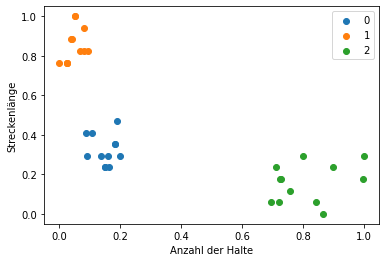

In [30]:


# die Koordinaten der Datenpunkte um das Streudiagramm zeichnen zu können
data_points = np.array([[0.0418059341609478, 0.8823529411764706],
                       [0.03865043446421623, 0.8823529411764706],
                       [0.06913211941719055, 0.8235294117647058],
                       [0.08081770688295364, 0.8235294117647058],
                       [0.026132041588425636, 0.7647058823529412],
                       [0.026132041588425636, 0.7647058823529412],
                       [0.026132041588425636, 0.7647058823529412],
                       [0.09365499764680862, 0.8235294117647058],
                       [0.0802222266793251, 0.9411764705882352],
                       [0.0, 0.7647058823529412],
                       [0.05030515417456627, 1.0],
                       [0.05030515417456627, 1.0],
                       [0.18185654282569885, 0.3529411764705882],
                       [0.18185654282569885, 0.3529411764705882],
                       [0.1615954488515854, 0.2941176470588235],
                       [0.20047201216220856, 0.2941176470588235],
                       [0.13671165704727173, 0.2941176470588235],
                       [0.1900033801794052, 0.4705882352941176],
                       [0.10838034003973007, 0.4117647058823529],
                       [0.1640133410692215, 0.2352941176470588],
                       [0.15027260780334473, 0.2352941176470588],
                       [0.15027260780334473, 0.2352941176470588],
                       [0.08914268016815186, 0.4117647058823529],
                       [0.09186362475156784, 0.2941176470588235],
                       [0.8996241688728333, 0.2352941176470588],
                       [0.8015787601470947, 0.2941176470588235],
                       [0.8428218364715576, 0.0588235294117647],
                       [0.7590007781982422, 0.1176470588235294],
                       [0.7277239561080933, 0.1764705882352941],
                       [0.72503662109375, 0.1764705882352941],
                       [0.7115687131881714, 0.2352941176470588],
                       [0.867732584476471, 0.0],
                       [1.0, 0.2941176470588235],
                       [0.9983829259872437, 0.1764705882352941],
                       [0.7218253016471863, 0.0588235294117647],
                       [0.695572018623352, 0.0588235294117647]])

# Führe hier deinen k-means-clustering Algorithmus aus
label = kmeans(data_points, 3, 1000)

# Visualisierung des Resultats
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(data_points[label == i, 0], data_points[label == i, 1], label=i)

plt.xlabel('Anzahl der Halte')
plt.ylabel('Streckenlänge')
plt.legend()
plt.show()

Klasse gemacht, jetzt kannst du mit Hilfe des kmeans Algorithmus die verschiedensten Datensätze ganz einfach sortieren. 

## Fragen & Feedback:

**Wenn ihr Fragen oder Anregungen zu der Aufgabe (oder Lösung) habt, dann tauscht euch gerne im [Chat](https://spectrum.chat/bwki/aufgabenarchiv/) darüber aus oder schreibt uns eine E-Mail (an info@bw-ki.de).**

Wir freuen uns auch immer über **Feedback** (auch unter info@bw-ki.de):

- War diese Aufgabe zu leicht, zu schwer oder genau richtig?
- Wie lang hast du für diese Aufgabe ungefähr gebraucht?
- Welche Art von Aufgaben wünschst du dir in Zukunft?